### Initial Configuration


In [1]:
!pip install cvxpy

In [2]:
import os, types, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxpy import *
from botocore.client import Config
import ibm_boto3

In [3]:
allocated_money = 1000000

### Drop stocks more expensive than allocated money

In [5]:
adj_price_table = adj_price_table.loc[:, adj_price_table.iloc[-1, :] * 100 <= allocated_money]
stock_list = adj_price_table.columns
adj_price_table.head()

,ADRO,ANTM,ASII,BBNI,BBRI,BBTN,BMRI,CPIN,EXCL,HMSP,...,INDF,KLBF,MNCN,PGAS,PTBA,PWON,TBIG,TLKM,TOWR,UNVR
0,1430.233398,1615.441772,4212.592773,1330.904663,986.410095,1350.109985,2716.816650,1672.843262,6118.498535,735.827942,...,4126.242188,597.086670,737.152466,2615.174072,2473.362305,194.313293,406.960205,1233.627686,183.986862,2413.033203
1,1592.760132,1526.681152,4407.654297,1330.904663,971.116699,1310.633301,2735.814453,1672.843262,5533.641602,760.793518,...,4014.722656,597.086670,812.543091,2647.863770,2356.903320,223.348618,373.396484,1233.627686,182.234619,2318.404297
2,1606.482178,1473.424927,4860.545410,1330.904663,1005.322632,1334.319458,2735.814453,1724.848511,5629.249512,751.595703,...,4274.936035,563.683228,770.659363,2631.519043,2306.992188,218.881607,398.569305,1177.553589,192.748154,2349.947021
3,1737.623291,1420.168823,5392.107910,1379.580933,1067.188721,1368.239014,3035.470947,2412.999512,5263.120117,874.176880,...,4721.015625,592.585205,896.310547,2598.829102,2362.448975,201.013748,377.639648,1226.297729,222.536514,2517.510498
4,1327.806641,1380.356079,5059.404297,1379.580933,1013.055908,1255.560547,2648.786377,2435.137207,4622.392090,846.859009,...,4635.394043,592.585205,829.296631,2001.312256,2159.379395,196.546768,373.396484,1209.613281,192.748154,2727.302979


### Plot Adjusted Closing Stock Price

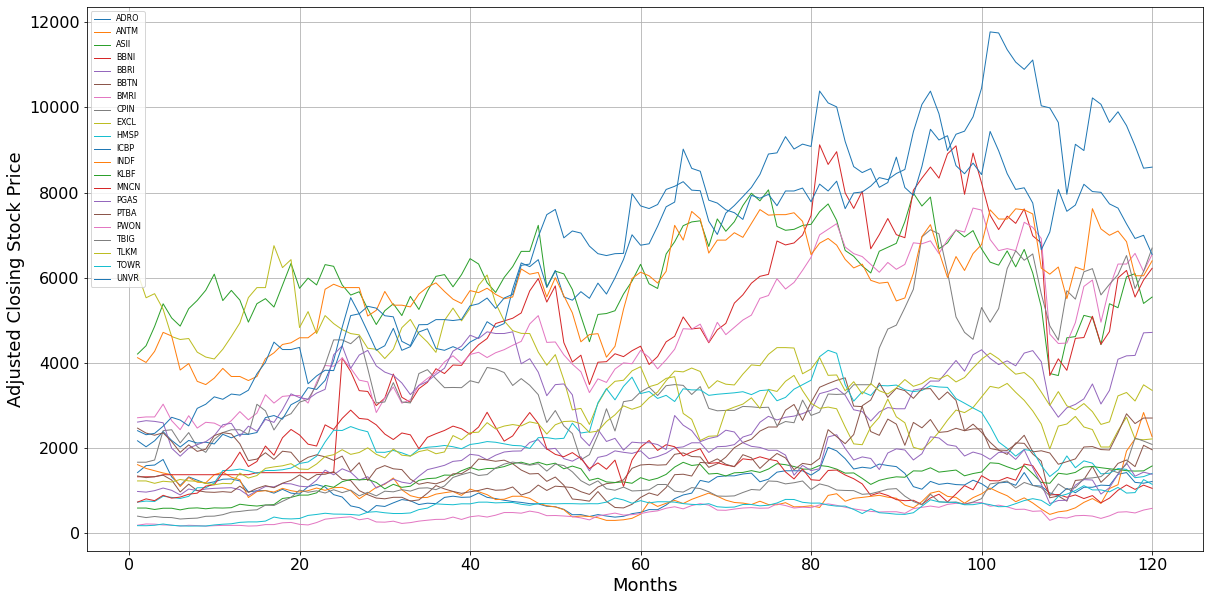

In [6]:
plt.figure(figsize=(20,10))
for stock in stock_list:
    plt.plot([i for i in range(1,month_length+1)],adj_price_table[stock],lw=1)

plt.legend(stock_list,fontsize=8)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Adjusted Closing Stock Price",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

### Compute Monthly Returns

In [7]:
return_table = pd.DataFrame()

for s in adj_price_table.columns:
    date = adj_price_table.index[0]
    pr0 = adj_price_table[s][date] 
    for t in range(1,len(adj_price_table.index)):
        date = adj_price_table.index[t]
        pr1 = adj_price_table[s][date]
        ret = (pr1-pr0)/pr0
        return_table.at[date,s] = ret
        pr0 = pr1

In [8]:
return_table.head()

,ADRO,ANTM,ASII,BBNI,BBRI,BBTN,BMRI,CPIN,EXCL,HMSP,...,INDF,KLBF,MNCN,PGAS,PTBA,PWON,TBIG,TLKM,TOWR,UNVR
1,0.113637,-0.054945,0.046304,0.000000,-0.015504,-0.029240,0.006993,0.000000,-0.095588,0.033929,...,-0.027027,0.000000,0.102273,0.012500,-0.047085,0.149425,-0.082474,0.000000,-0.009524,-0.039216
2,0.008615,-0.034884,0.102751,0.000000,0.035223,0.018072,0.000000,0.031088,0.017278,-0.012090,...,0.064815,-0.055944,-0.051546,-0.006173,-0.021177,-0.020000,0.067416,-0.045455,0.057692,0.013605
3,0.081632,-0.036144,0.109363,0.036574,0.061539,0.025421,0.109531,0.398963,-0.065041,0.163095,...,0.104348,0.051273,0.163044,-0.012422,0.024039,-0.081633,-0.052512,0.041394,0.154546,0.071305
4,-0.235849,-0.028034,-0.061702,0.000000,-0.050725,-0.082353,-0.127389,0.009174,-0.121739,-0.031250,...,-0.018136,0.000000,-0.074766,-0.229918,-0.085957,-0.022222,-0.011236,-0.013606,-0.133858,0.083333
5,-0.150617,-0.202128,-0.037793,0.000000,-0.106870,-0.224359,-0.080292,-0.127273,-0.014851,-0.029032,...,-0.172131,-0.064748,0.030303,-0.093220,-0.118110,-0.113636,-0.090909,0.048276,-0.072727,-0.023669


### Plot Monthly Returns

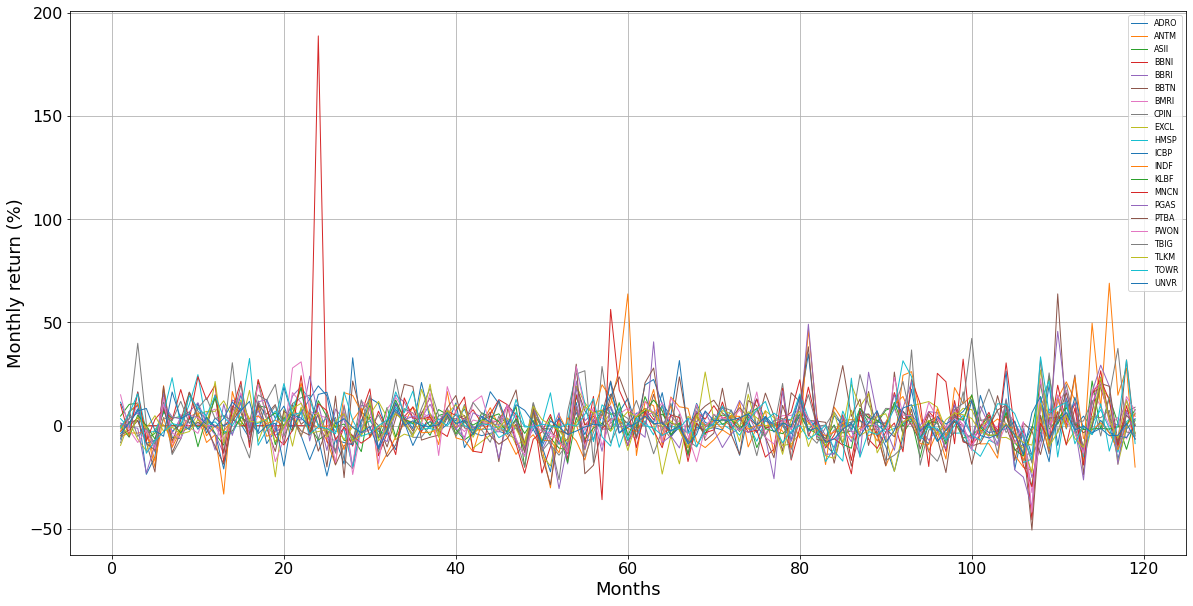

In [9]:
plt.figure(figsize=(20,10))
for stock in stock_list:
    plt.plot([i for i in range(1,month_length)],100*return_table[stock],lw=1)
    
plt.legend(stock_list,fontsize=8)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Monthly return (%)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

### Compute Returns & Risks

In [10]:
return_data = return_table.to_numpy().T

In [11]:
mean_return = np.asarray(np.mean(return_data, axis=1))
mean_return

array([ 0.00531799,  0.01444259,  0.00541562,  0.02422162,  0.0165232 ,
        0.01175095,  0.01043041,  0.01810745, -0.00333345,  0.00890191,
        0.01380149,  0.00621151,  0.01041903,  0.0121945 ,  0.00338655,
        0.00785254,  0.01561259,  0.0194393 ,  0.01057207,  0.01978342,
        0.01040131])

In [12]:
covariance_matrix = np.asmatrix(np.cov(return_data))
covariance_matrix

matrix([[ 1.37173741e-02,  6.78119551e-03,  3.00792141e-03,
          1.12068087e-03,  2.16558531e-03,  2.49789246e-03,
          2.19317661e-03,  2.19883566e-03,  2.56021922e-03,
          1.31344085e-03, -5.43319337e-04,  1.11505642e-03,
          1.03092981e-03,  3.94729720e-03,  5.09265672e-03,
          9.51385496e-03,  1.81231345e-03,  2.60000001e-04,
          5.79850796e-04, -5.05385559e-06, -1.02655494e-03],
        [ 6.78119551e-03,  2.58527169e-02,  3.10434187e-03,
          2.25790740e-03,  3.06812224e-03,  5.42793542e-03,
          2.98566771e-03,  3.25658128e-03,  1.65977309e-03,
          3.45896028e-04,  5.83640102e-04,  2.24968407e-03,
          1.18575677e-03,  6.24713779e-03,  8.78900801e-03,
          8.35193505e-03,  5.13381677e-03,  4.73858063e-03,
          1.87671690e-03,  1.36252483e-03,  5.78318013e-04],
        [ 3.00792141e-03,  3.10434187e-03,  6.08799097e-03,
          1.72871743e-03,  3.30490642e-03,  3.46147150e-03,
          3.63244235e-03,  3.84631178e

In [13]:
for i in range(len(stock_list)):
    print ('%s: Exp return = %f, Risk = %f' %(stock_list[i], mean_return[i], covariance_matrix[i,i]**0.5))

ADRO: Exp return = 0.005318, Risk = 0.117121
ANTM: Exp return = 0.014443, Risk = 0.160788
ASII: Exp return = 0.005416, Risk = 0.078026
BBNI: Exp return = 0.024222, Risk = 0.193750
BBRI: Exp return = 0.016523, Risk = 0.080821
BBTN: Exp return = 0.011751, Risk = 0.130993
BMRI: Exp return = 0.010430, Risk = 0.076112
CPIN: Exp return = 0.018107, Risk = 0.115386
EXCL: Exp return = -0.003333, Risk = 0.101082
HMSP: Exp return = 0.008902, Risk = 0.083889
ICBP: Exp return = 0.013801, Risk = 0.067003
INDF: Exp return = 0.006212, Risk = 0.071798
KLBF: Exp return = 0.010419, Risk = 0.066751
MNCN: Exp return = 0.012195, Risk = 0.137566
PGAS: Exp return = 0.003387, Risk = 0.133329
PTBA: Exp return = 0.007853, Risk = 0.120444
PWON: Exp return = 0.015613, Risk = 0.110757
TBIG: Exp return = 0.019439, Risk = 0.109858
TLKM: Exp return = 0.010572, Risk = 0.066156
TOWR: Exp return = 0.019783, Risk = 0.095802
UNVR: Exp return = 0.010401, Risk = 0.063672


### Optimization Model

In [14]:
# The variables vector
x = Variable(len(stock_list))
y = Variable(len(stock_list))

# The return
ret_x = mean_return.T*x
ret_y = mean_return.T*y

# The risk in xT.Q.x format
risk_x = quad_form(x, covariance_matrix)
risk_y = quad_form(y, covariance_matrix)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg,

In [43]:
# Risk tolerance
max_risk = 0.2

# Minimum return
min_ret = 0.022

# The core problem definition with the Problem class from CVXPY
prob_max_ret = Problem(Maximize(ret_x), [sum(x)==1, risk_x <= max_risk**2, x >= 0])
prob_min_risk = Problem(Minimize(risk_y), [sum(y)==1, ret_y >= min_ret, y >= 0])


try:
    prob_max_ret.solve()
    print ("\nOptimal portfolio recommender\n")
    print ("==============================================")
    print ("Maximize Return")
    print ("----------------------------------------------")
    for s in range(len(stock_list)):
        if round(100*x.value[s],2) > 0:
            print (" Investment in {} : {}% of the portfolio (Rp{})".format(stock_list[s],round(100*x.value[s],2),round(x.value[s]*allocated_money)))
    print ("----------------------------------------------")
    print ("Expected return = {}%".format(round(100*ret_x.value,2)))
    print ("Risk            = {}%".format(round(100*risk_x.value**0.5,2)))
    print ("==============================================")
    
    prob_min_risk.solve()
    print ("\n")
    print ("==============================================")
    print ("Minimize Risk")
    print ("----------------------------------------------")
    for s in range(len(stock_list)):
        if round(100*y.value[s],2) > 0:
            print (" Investment in {} : {}% of the portfolio (Rp{})".format(stock_list[s],round(100*y.value[s],2),round(y.value[s]*allocated_money)))
    print ("----------------------------------------------")
    print ("Expected return = {}%".format(round(100*ret_y.value,2)))
    print ("Risk            = {}%".format(round(100*risk_y.value**0.5,2)))
    print ("==============================================")
except:
    print ("Error") 


Optimal portfolio recommender

Maximize Return
----------------------------------------------
 Investment in BBNI : 100.0% of the portfolio (Rp1000000.0)
----------------------------------------------
Expected return = 2.42%
Risk            = 19.37%


Minimize Risk
----------------------------------------------
 Investment in BBNI : 51.26% of the portfolio (Rp512609.0)
 Investment in TBIG : 16.99% of the portfolio (Rp169946.0)
 Investment in TOWR : 31.74% of the portfolio (Rp317445.0)
----------------------------------------------
Expected return = 2.2%
Risk            = 10.77%
